### Bike-sharing Multiple Linear Regression Project
<p> Sophia Moore
<br> Summer 2022

Biking-sharing data available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset#)

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
hour_raw = pd.read_csv("C:/Users/sophi/Documents/Bike July Folder/hour.csv")
hour_raw.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### EDA

In [70]:
print(list(hour_raw.columns))
hour_raw.shape

['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


(17379, 17)

In [71]:
renameDict = {'weekday': {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}, 'weathersit': {1: 'Clear', 2: 'Mist', 3: 'Light', 4: 'Heavy'}}
hour = hour_raw.replace(renameDict)
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,Mon,1,Mist,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,Mon,1,Mist,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,Mon,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,Mon,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61


- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

##### Comparing Registered and Casual Users

In [72]:
sns.displot(data=hour, x="registered", hue="weathersit", kind='kde');

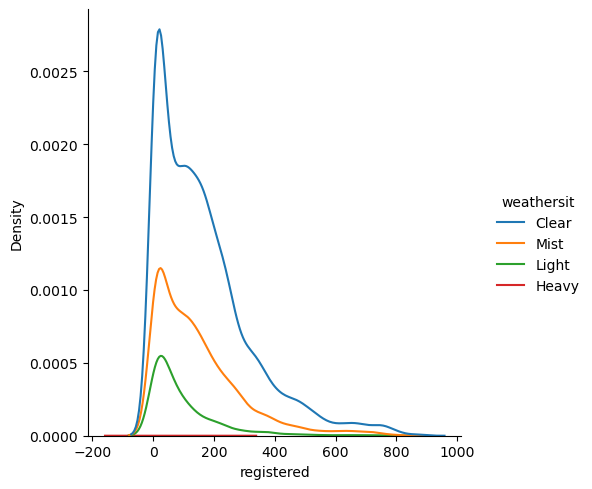

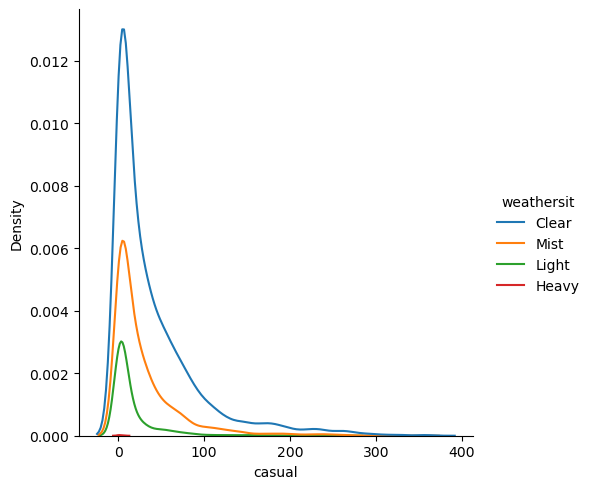

In [73]:
sns.displot(data=hour, x="casual", hue="weathersit", kind='kde');
plt.show()

It is evident that registered bike usage is more tolerant to inclement weather. Because registered bike usage is more stable, the bike-sharing business would benefit from knowing under what conditions fewer resources are necessary to serve the consumers. For example, if humidity discourages casual bike users, the bike-sharing company would not have to redistribute as many bikes as it would on more tolerable days. 

##### Feature Selection
<p> I will examine relationships between count and various features, check for correlation and plot for visual confirmation

In [74]:
#plotting only a sample of the data for visual clarity
hourSample = hour.sample(1200)

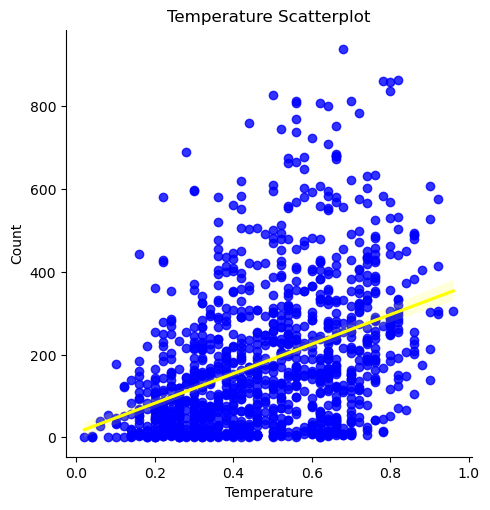

In [75]:
tempScatter = sns.lmplot(x='temp', y='cnt', data=hourSample, scatter_kws={"color": "blue"}, line_kws={"color": "yellow"}); 
tempScatter.set(xlabel="Temperature", ylabel="Count", title="Temperature Scatterplot");
plt.show()

The correlation between temperature and activity appears to be positive and linear. This follows for adjusted temperature as well. 

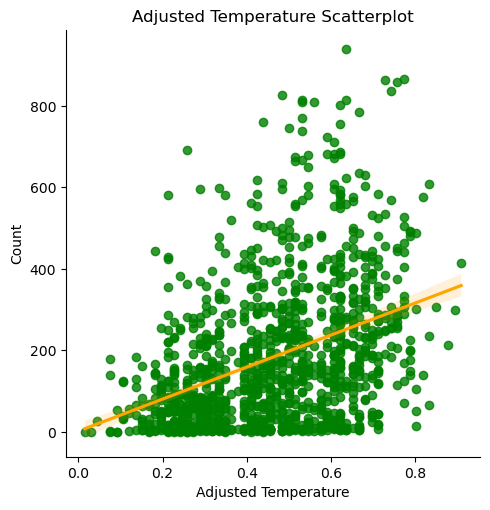

In [76]:
atempScatter = sns.lmplot(y='cnt', x='atemp', data=hourSample, scatter_kws={"color": "green"}, line_kws={"color": "orange"}) 
atempScatter.set(xlabel="Adjusted Temperature", ylabel="Count", title="Adjusted Temperature Scatterplot");
plt.show()

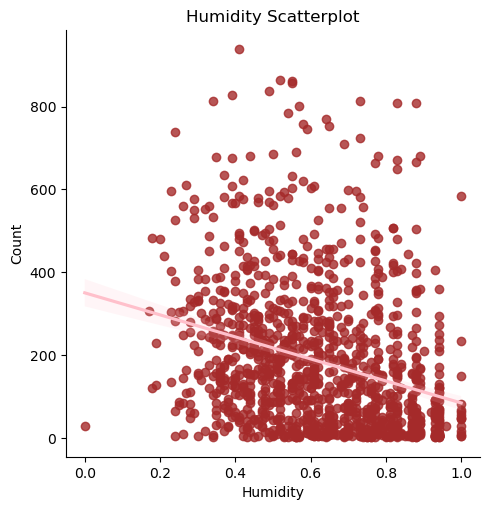

In [77]:
humScatter = sns.lmplot(y='cnt', x='hum', data=hourSample, scatter_kws={"color": "brown"}, line_kws={"color": "pink"})
humScatter.set(xlabel="Humidity", ylabel="Count", title="Humidity Scatterplot");
plt.show()

Humidity also appears to have a relatively linear relationship with user activity, and a negative correlation. 

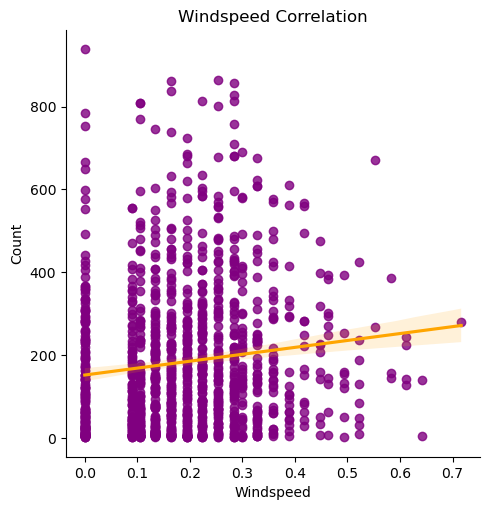

In [78]:
windScatter = sns.lmplot(y='cnt', x='windspeed', data=hourSample, scatter_kws={"color": "purple"}, line_kws={"color": "orange"})
windScatter.set(xlabel="Windspeed", ylabel="Count", title="Windspeed Correlation");
plt.show()

The linear regression model and the scatterplot are at odds in this case, with a positive linear correlation where I would expect a negative one from the plot. It is reasonable to see that people tend not to use the bikes in windy conditions, but the relationship is not strongly linear enough to generate a meaningful result.

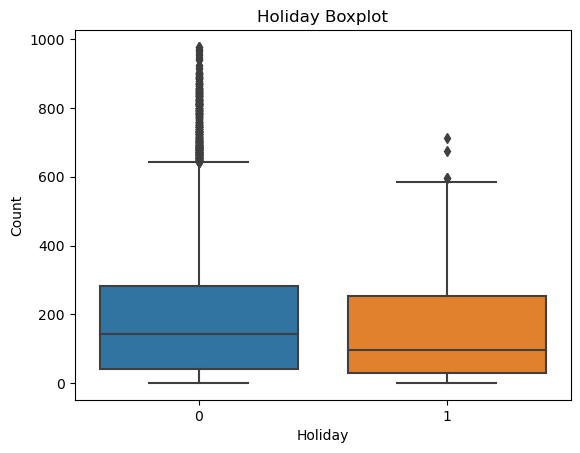

In [79]:
holBox = sns.boxplot(x='holiday', y='cnt', data=hour)
holBox.set(xlabel="Holiday", ylabel="Count", title="Holiday Boxplot");
plt.show()

This boxplot suggests that there tends to be more activity on non-holidays than on holidays. Here, I am using the original dataset rather than the sample of it because there are fewer holiday datapoints.

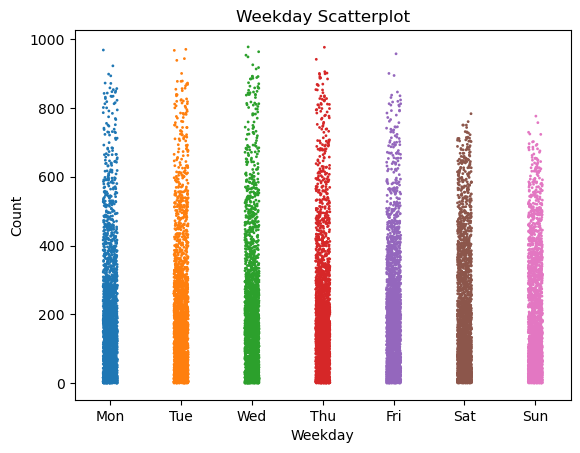

In [80]:
weekStrip = sns.stripplot(x='weekday', y='cnt', data=hour, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], size=2.0)
weekStrip.set(xlabel="Weekday", ylabel="Count", title="Weekday Scatterplot");
plt.show()

In the same vein, the scatterplot above and the boxplot below of usage grouped by the day of the week and workingday, respectively, point to the higher usage during weekdays rather than weekends.

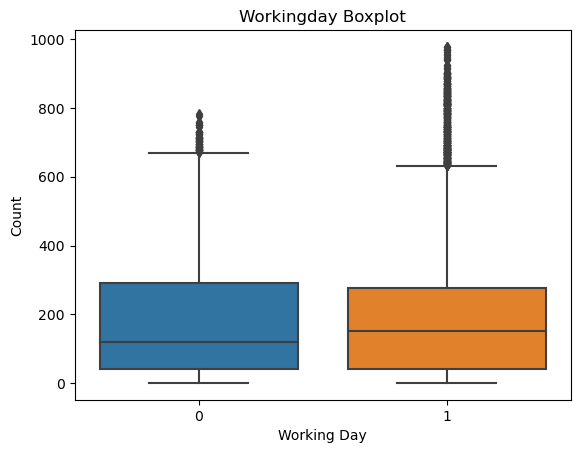

In [81]:
workBox = sns.boxplot(x='workingday', y='cnt', data=hour)
workBox.set(xlabel="Working Day", ylabel="Count", title="Workingday Boxplot");
plt.show()

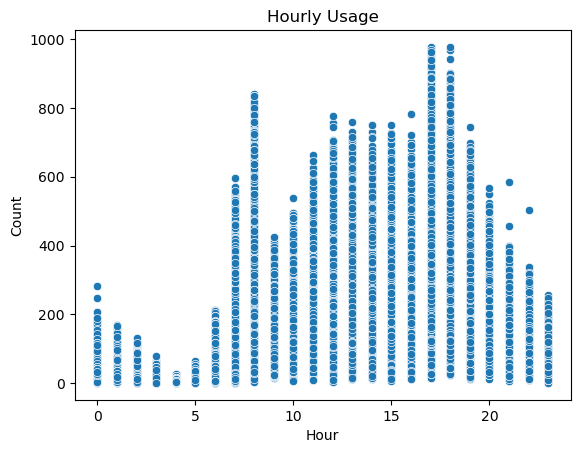

In [82]:
hourScatter = sns.scatterplot(x='hr', y='cnt', data=hour)
hourScatter.set(xlabel="Hour", ylabel="Count", title="Hourly Usage");
plt.show()

The pattern of usage based on hours is consistent with working day commute times: peaks at around 8:00 am, and 4:00 to 5:00pm.

###### Selecting Columns
<p> weekday, hour, temperature, feeling temperature, humidity, windspeed, count

In [83]:
hourModel = hour[["weekday", "hr", "weathersit", "temp", "atemp", "hum", "windspeed", "cnt"]]
hourModel

,weekday,hr,weathersit,temp,atemp,hum,windspeed,cnt
0,Sat,0,Clear,0.24,0.2879,0.81,0.0000,16
1,Sat,1,Clear,0.22,0.2727,0.80,0.0000,40
2,Sat,2,Clear,0.22,0.2727,0.80,0.0000,32
3,Sat,3,Clear,0.24,0.2879,0.75,0.0000,13
4,Sat,4,Clear,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...
17374,Mon,19,Mist,0.26,0.2576,0.60,0.1642,119
17375,Mon,20,Mist,0.26,0.2576,0.60,0.1642,89
17376,Mon,21,Clear,0.26,0.2576,0.60,0.1642,90
17377,Mon,22,Clear,0.26,0.2727,0.56,0.1343,61


##### Autocorrelation of Cyclic Data: Count
[Source](https://towardsdatascience.com/advanced-time-series-analysis-in-python-decomposition-autocorrelation-115aa64f475e)

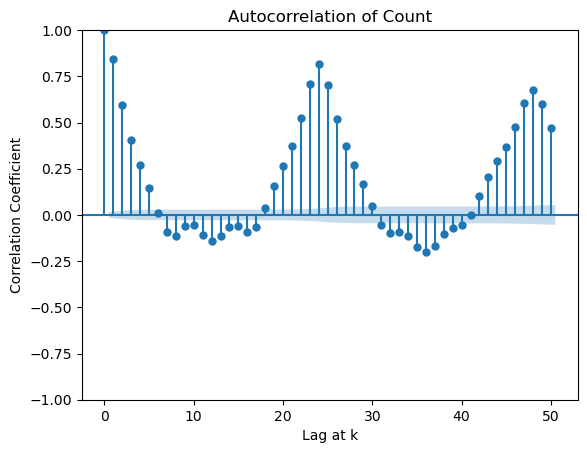

In [84]:
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(hour["cnt"], lags=50)

plt.title("Autocorrelation of Count")
plt.xlabel("Lag at k")
plt.ylabel("Correlation Coefficient");
plt.show()

The plot of the autocorrelation function displays what I would expected about the data: peaks of correlatedness every 24 hours. I also observe that the strongest corelations are at lags $k=1,2,3$, so I add three lag values of count to the model. After adding these lag values, the R-squared value increased from 34% to 83%, and the MAE from 105 to 50.<p>
    [Source](https://towardsdatascience.com/advanced-time-series-analysis-in-python-decomposition-autocorrelation-115aa64f475e)

In [85]:
hourModel['cnt_lag1'] = hour['cnt'].shift(1, fill_value=0)
hourModel['cnt_lag2'] = hour['cnt'].shift(2, fill_value=0)
hourModel['cnt_lag3'] = hour['cnt'].shift(3, fill_value=0)

hourModel

C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,weekday,hr,weathersit,temp,atemp,hum,windspeed,cnt,cnt_lag1,cnt_lag2,cnt_lag3
0,Sat,0,Clear,0.24,0.2879,0.81,0.0000,16,0,0,0
1,Sat,1,Clear,0.22,0.2727,0.80,0.0000,40,16,0,0
2,Sat,2,Clear,0.22,0.2727,0.80,0.0000,32,40,16,0
3,Sat,3,Clear,0.24,0.2879,0.75,0.0000,13,32,40,16
4,Sat,4,Clear,0.24,0.2879,0.75,0.0000,1,13,32,40
...,...,...,...,...,...,...,...,...,...,...,...
17374,Mon,19,Mist,0.26,0.2576,0.60,0.1642,119,122,164,214
17375,Mon,20,Mist,0.26,0.2576,0.60,0.1642,89,119,122,164
17376,Mon,21,Clear,0.26,0.2576,0.60,0.1642,90,89,119,122
17377,Mon,22,Clear,0.26,0.2727,0.56,0.1343,61,90,89,119


##### One-hot encoding categorical columns
weekday, hour, and weather situation columns using sklearn <p>
[Source 1](https://poopcode.com/python-code-snippet-how-to-use-one-hot-encoding-in-multiple-columns-at-once/)

In [86]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
categorical_cols = ['weekday', 'hr', "weathersit"]

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
hourModel[categorical_cols] = hourModel[categorical_cols].apply(lambda col: le.fit_transform(col))    
ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
array_hot_encoded = ohe.fit_transform(hourModel[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded.toarray())
                                #columns=ohe.get_feature_names())
                                #, index=hourModel.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = hourModel.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
hourProcessed = pd.concat([data_hot_encoded, data_other_cols], axis=1)
hourProcessed

C:\Users\sophi\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,0,1,2,3,4,5,6,7,8,9,...,33,34,temp,atemp,hum,windspeed,cnt,cnt_lag1,cnt_lag2,cnt_lag3
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.24,0.2879,0.81,0.0000,16,0,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.22,0.2727,0.80,0.0000,40,16,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.22,0.2727,0.80,0.0000,32,40,16,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.24,0.2879,0.75,0.0000,13,32,40,16
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.24,0.2879,0.75,0.0000,1,13,32,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.26,0.2576,0.60,0.1642,119,122,164,214
17375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.26,0.2576,0.60,0.1642,89,119,122,164
17376,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.26,0.2576,0.60,0.1642,90,89,119,122
17377,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.26,0.2727,0.56,0.1343,61,90,89,119


##### Spliting the Dataset into Training and Test Sets
<p> Because this involves Time Series data, the train/test split is divided into the first 20 months and the last 4 months of the data.   

    
[Source](https://towardsdatascience.com/time-series-from-scratch-train-test-splits-and-evaluation-metrics-4fd654de1b37)

In [87]:
test_size = (len(hour)*5)//6

df_train = hourProcessed[:-test_size]
df_test = hourProcessed[-test_size:]

x_train = df_train.drop(['cnt'], axis=1)
y_train = df_train[['cnt']]

x_test = df_test.drop(['cnt'], axis=1)
y_test = df_test[['cnt']]

##### Multiple Linear Regression

Multiple Linear regression model: <p>
    $$\hat{y_i} = \theta_0 \cdot 1 + \theta_1 \cdot x_1 + \dots + \theta_p x_p$$
    
thus prediction vector $\hat{\mathbb{Y}}$ is

$$\Large \hat{\mathbb{Y}} = \mathbb{X} \theta$$

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [89]:
mlr = LinearRegression()
mlr.fit(X = x_train, y = y_train)
y_pred = mlr.predict(x_test)

C:\Users\sophi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\sophi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [90]:
def mae(y_test, y_pred):
    """
    Mean absolute error
    """
    return np.mean(np.abs(y_test - y_pred))
modelMAE = mae(y_test, y_pred).round(3)[0]
print("Mean absolute error:", modelMAE);

Mean absolute error: 50.517


In [91]:
def rmse(y_test, y_pred):
    """
    Root Mean squared error
    """
    return np.sqrt(np.mean(np.square(y_test - y_pred)))
modelRMSE = rmse(y_test, y_pred).round(3)[0]
print("Root Mean squared error:", modelRMSE);

Root Mean squared error: 76.574


In [92]:
modelR2 = metrics.r2_score(y_test, y_pred).round(3)
#0.83 -> 83% of the dependent variable variation is explained by this linear model.
print("R squared value:", modelR2)

R squared value: 0.835


Given a MAE of 50.5 and a RMSE of 76.57, this model might be applicable in areas with higher population and traffic, but less applicable in sparsely populated areas, where larger errors in prediction of bike usage may be more costly. The model appears to have been moderately successful, having acheived a 83.5% goodness-of-fit metric.  